### Hotel Recommendation

### Import Libraries

In [1]:
 import pandas as pd
 import numpy as np
 import seaborn as sns
 import vaex as vx
 import matplotlib.pyplot as plt
 import math


 plt.style.use('fivethirtyeight') # For better style

### Convert csv to hdf5, so that it can be loaded with vaex, quickly in future

In [2]:
%%time
train_data = vx.read_csv_and_convert("train.csv", chunk_size=50000, progress=True)

CPU times: user 7.86 ms, sys: 102 µs, total: 7.96 ms
Wall time: 7.58 ms


In [3]:
dest_data = vx.read_csv_and_convert("destinations.csv")

In [4]:
%%time
train_data = vx.open("train.csv.hdf5")

CPU times: user 7.67 ms, sys: 81 µs, total: 7.75 ms
Wall time: 7.45 ms


In [5]:
dest_data = vx.open("destinations.csv.hdf5")

In [6]:
train_data.info()

column,type,unit,description,expression
date_time,str,,,
site_name,int64,,,
posa_continent,int64,,,
user_location_country,int64,,,
user_location_region,int64,,,
user_location_city,int64,,,
orig_destination_distance,float64,,,
user_id,int64,,,
is_mobile,int64,,,
is_package,int64,,,


In [7]:
train_data.describe()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
dtype,str,int64,int64,int64,int64,int64,float64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
count,37670293,37670293,37670293,37670293,37670293,37670293,24145292,37670293,37670293,37670293,...,37670293,37670293,37670293,37670293,37670293,37670293,37670293,37670293,37670293,37670293
NA,0,0,0,0,0,0,13525001,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mean,--,9.795271329585889,2.6804730188851997,86.10880194109454,308.4060117610447,27753.044729330883,1970.09002672063,604451.7531778422,0.1349265056154461,0.24890422275186444,...,0.3321221579030458,1.1126628083301608,14441.090543760836,2.5822799148389954,0.07965674702875288,1.4833839227106622,3.1563047837190967,81.29685165974153,600.461883638654,49.80860501934509
std,--,11.967543,0.748039,59.243103,208.443747,16782.552973,2232.442384,350617.457388,0.341645,0.432378,...,0.731498,0.459115,11066.302186,2.153019,0.270761,1.219776,1.623189,56.171187,511.739120,28.915950
min,--,2,0,0,0,0,0.005600,0,0,0,...,0,0,0,0,0,1,0,0,0,0
max,--,53,4,239,1027,56508,12407.902200,1198785,1,1,...,9,8,65107,9,1,269,6,212,2117,99


In [8]:
dest_data.info()

column,type,unit,description,expression
srch_destination_id,int64,,,
d1,float64,,,
d2,float64,,,
d3,float64,,,
d4,float64,,,
d5,float64,,,
d6,float64,,,
d7,float64,,,
d8,float64,,,
d9,float64,,,


In [9]:
dest_data.describe()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
count,62106,62106,62106,62106,62106,62106,62106,62106,62106,62106,...,62106,62106,62106,62106,62106,62106,62106,62106,62106,62106
NA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mean,32359.463884326797,-2.1939032318063996,-2.2028544362513793,-2.2073905487681817,-2.194039670544935,-2.1614965229729304,-2.045110295419076,-2.2024330994997445,-2.203207293139685,-2.1078081438088043,...,-2.2040919397787224,-2.1969194438610438,-2.2032615050975024,-2.2051276104689266,-2.201924951668975,-2.203332024050514,-2.2029893378333054,-2.2083586793054852,-2.2082688195858133,-2.19946978747039
std,18711.615120,0.038575,0.041065,0.040091,0.041406,0.066196,0.135802,0.038885,0.036578,0.197902,...,0.037164,0.059913,0.046520,0.039465,0.041603,0.038239,0.051552,0.038035,0.038569,0.042438
min,0,-2.597617,-2.671613,-2.671613,-2.671613,-2.671613,-2.344165,-2.671613,-2.671613,-2.495544,...,-2.620769,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613
max,64993,-1.596004,-1.341325,-1.917826,-1.814585,-1.607558,-1.209058,-1.474441,-1.879678,-0.977219,...,-1.855317,-0.960356,-1.357408,-1.775218,-1.790435,-1.799341,-1.335962,-1.816892,-1.718778,-1.500309


In [10]:
train_data.site_name.data_type()

dtype('int64')

In [11]:
def plot_density_plots(features, df, ncol=3):
    cols = ncol
    rows = math.ceil(len(features)/cols) 
    fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(20, rows*3))
    i = 0
    for col in features:
        if(df[col].data_type() != str):
            plt.sca(axes[i//cols, i%cols])
            df.plot1d(col)
            i+=1
    plt.show() 

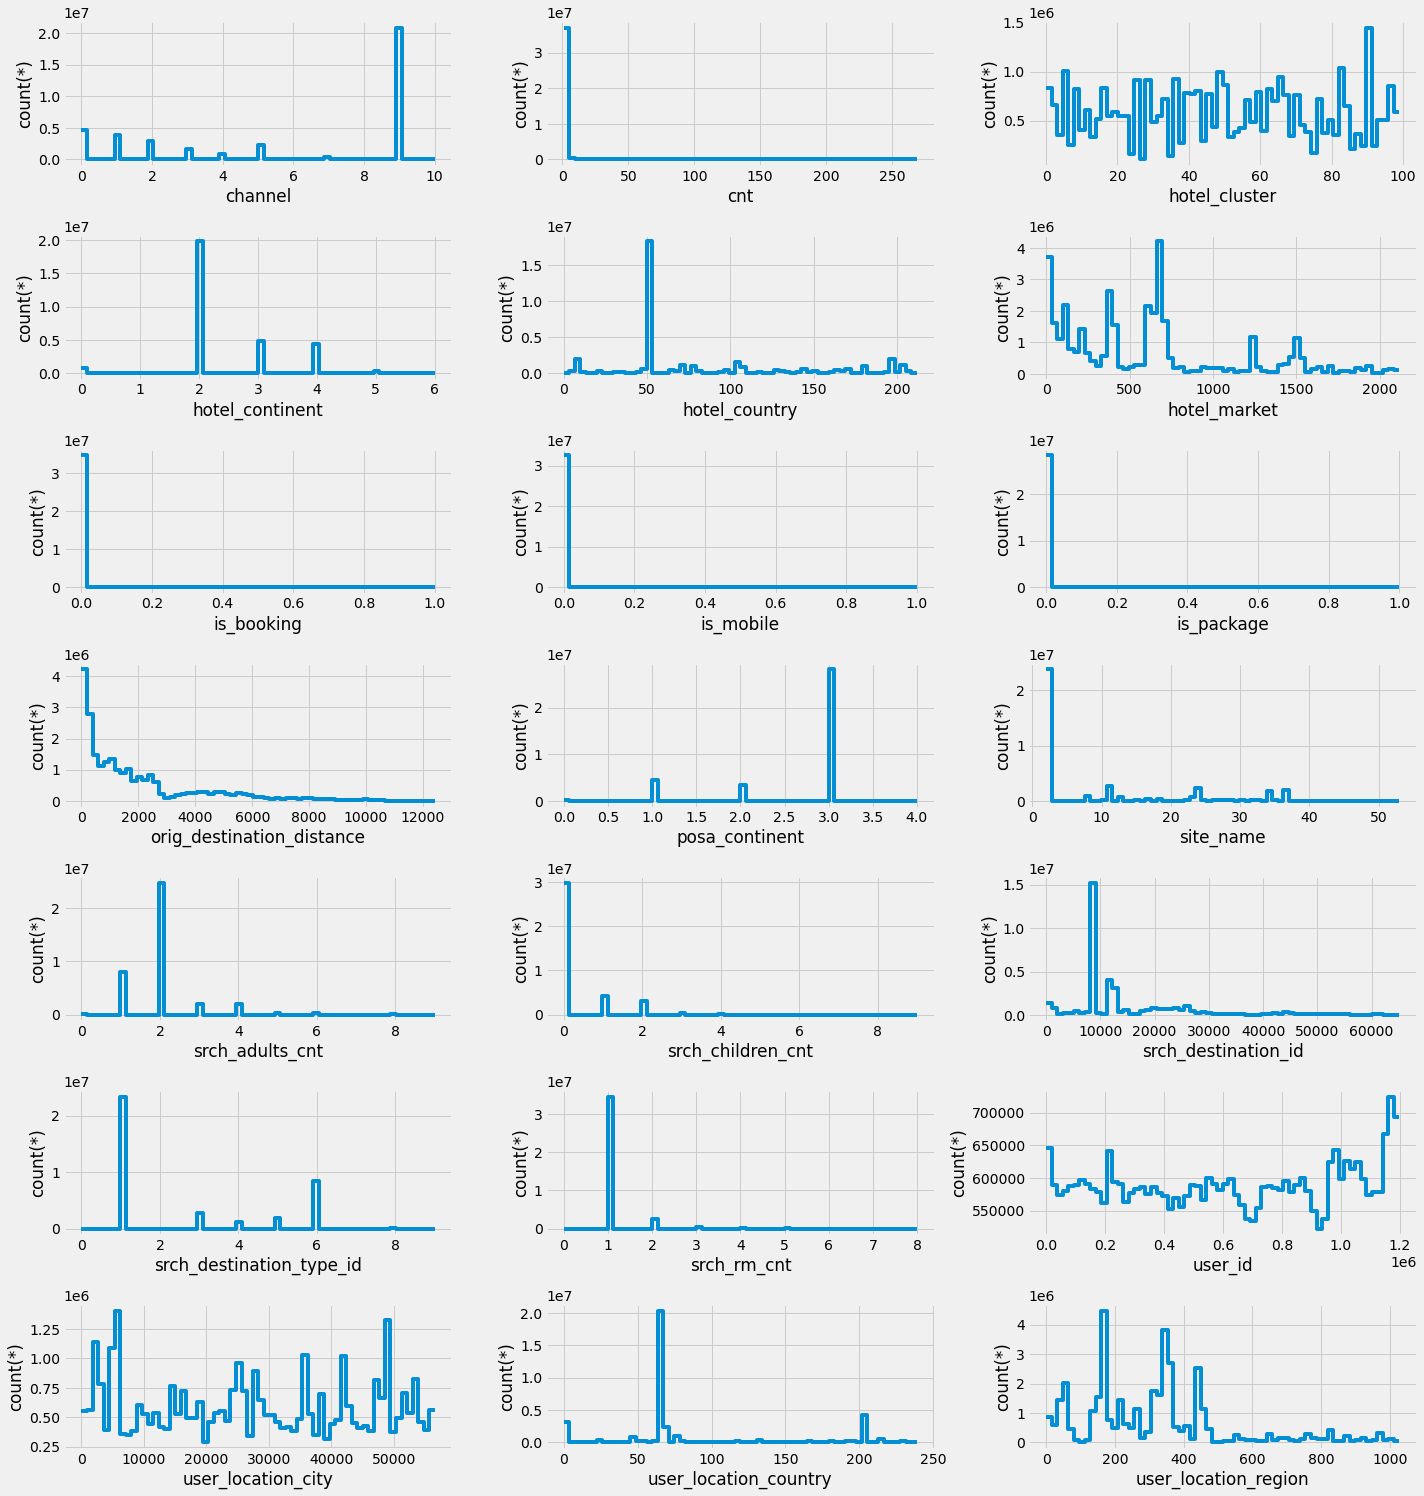

In [12]:
num_cols = [col for col in train_data.columns if train_data[col].data_type() != str]
plot_density_plots(num_cols, train_data)

### Use KMeans to convert desination reviews to clusters and inturn numeric one column

In [13]:
dest_train_col = [col for col in dest_data.column_names]
dest_train_col.remove('srch_destination_id')

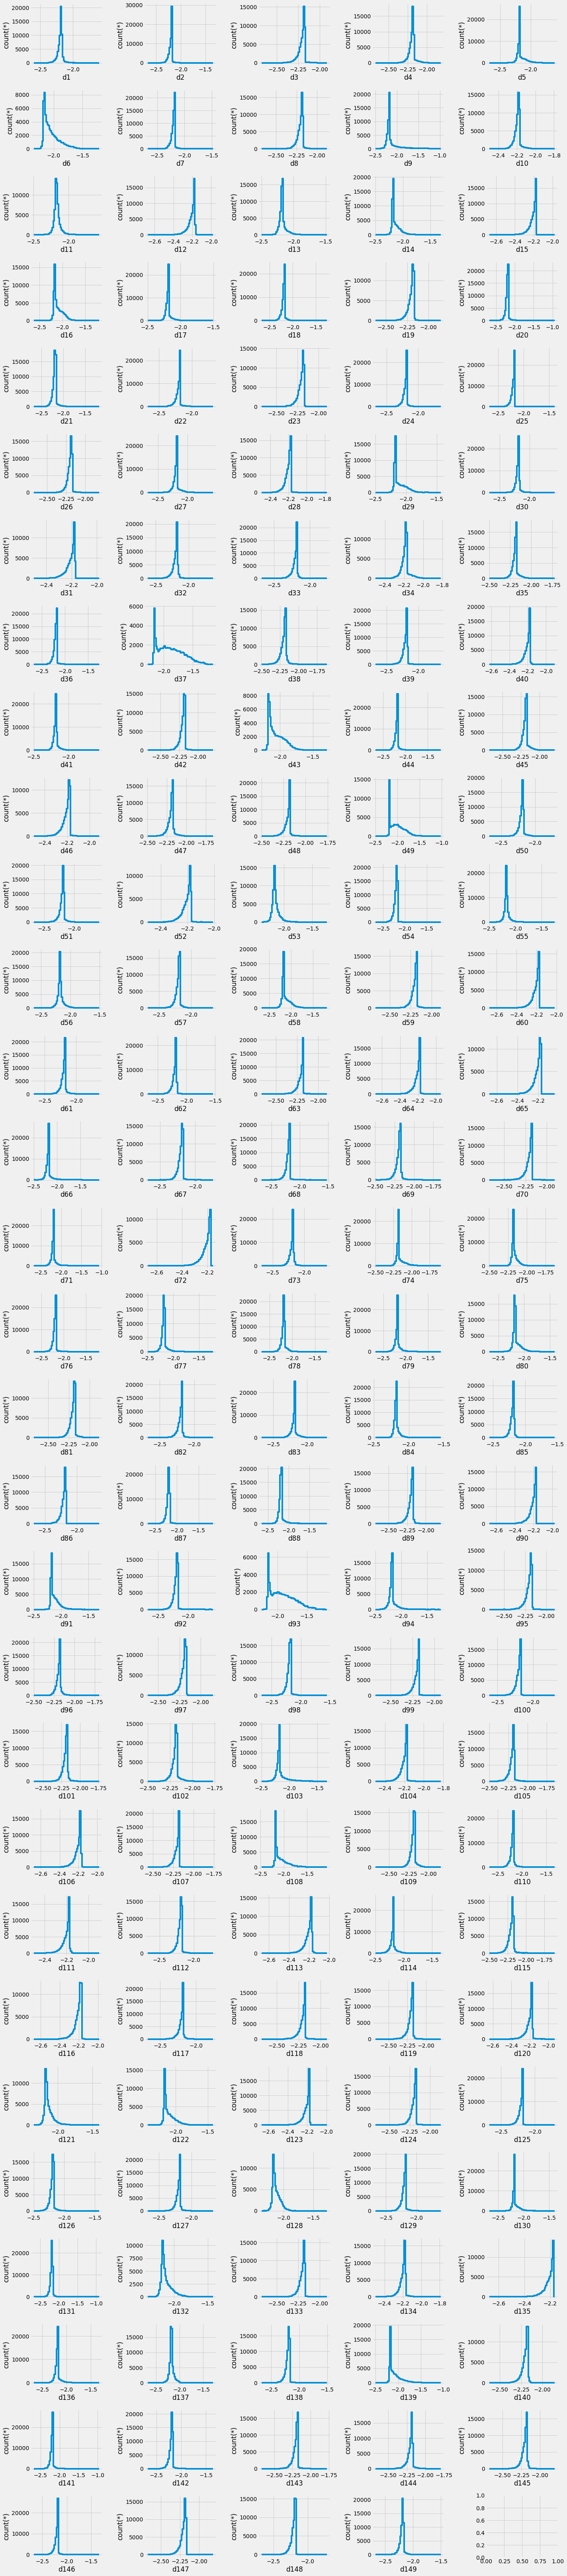

In [14]:
plot_density_plots(dest_train_col, dest_data, ncol =5)

In [15]:
from vaex import ml
scaler = ml.StandardScaler(features=dest_train_col, prefix='scaled_')
scaler.fit(dest_data)
df_trans = scaler.transform(dest_data)
df_trans

#,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65,d66,d67,d68,d69,d70,d71,d72,d73,d74,d75,d76,d77,d78,d79,d80,d81,d82,d83,d84,d85,d86,d87,d88,d89,d90,d91,d92,d93,d94,d95,d96,d97,d98,d99,d100,d101,d102,d103,d104,d105,d106,d107,d108,d109,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149,scaled_d1,scaled_d2,scaled_d3,scaled_d4,scaled_d5,scaled_d6,scaled_d7,scaled_d8,scaled_d9,scaled_d10,scaled_d11,scaled_d12,scaled_d13,scaled_d14,scaled_d15,scaled_d16,scaled_d17,scaled_d18,scaled_d19,scaled_d20,scaled_d21,scaled_d22,scaled_d23,scaled_d24,scaled_d25,scaled_d26,scaled_d27,scaled_d28,scaled_d29,scaled_d30,scaled_d31,scaled_d32,scaled_d33,scaled_d34,scaled_d35,scaled_d36,scaled_d37,scaled_d38,scaled_d39,scaled_d40,scaled_d41,scaled_d42,scaled_d43,scaled_d44,scaled_d45,scaled_d46,scaled_d47,scaled_d48,scaled_d49,scaled_d50,scaled_d51,scaled_d52,scaled_d53,scaled_d54,scaled_d55,scaled_d56,scaled_d57,scaled_d58,scaled_d59,scaled_d60,scaled_d61,scaled_d62,scaled_d63,scaled_d64,scaled_d65,scaled_d66,scaled_d67,scaled_d68,scaled_d69,scaled_d70,scaled_d71,scaled_d72,scaled_d73,scaled_d74,scaled_d75,scaled_d76,scaled_d77,scaled_d78,scaled_d79,scaled_d80,scaled_d81,scaled_d82,scaled_d83,scaled_d84,scaled_d85,scaled_d86,scaled_d87,scaled_d88,scaled_d89,scaled_d90,scaled_d91,scaled_d92,scaled_d93,scaled_d94,scaled_d95,scaled_d96,scaled_d97,scaled_d98,scaled_d99,scaled_d100,scaled_d101,scaled_d102,scaled_d103,scaled_d104,scaled_d105,scaled_d106,scaled_d107,scaled_d108,scaled_d109,scaled_d110,scaled_d111,scaled_d112,scaled_d113,scaled_d114,scaled_d115,scaled_d116,scaled_d117,scaled_d118,scaled_d119,scaled_d120,scaled_d121,scaled_d122,scaled_d123,scaled_d124,scaled_d125,scaled_d126,scaled_d127,scaled_d128,scaled_d129,scaled_d130,scaled_d131,scaled_d132,scaled_d133,scaled_d134,scaled_d135,scaled_d136,scaled_d137,scaled_d138,scaled_d139,scaled_d140,scaled_d141,scaled_d142,scaled_d143,scaled_d144,scaled_d145,scaled_d146,scaled_d147,scaled_d148,scaled_d149
0,0,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.1986

In [16]:
from sklearn.cluster import MiniBatchKMeans
features = [col for col in df_trans.column_names if col.startswith("scaled_")]
df_train_dest = df_trans[features].to_pandas_df()
model = MiniBatchKMeans(n_clusters = 20, max_iter=100, random_state=42)
labels = model.fit_predict(df_train_dest)

In [17]:
dest_data["prediction"]=labels
dest_data

#,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65,d66,d67,d68,d69,d70,d71,d72,d73,d74,d75,d76,d77,d78,d79,d80,d81,d82,d83,d84,d85,d86,d87,d88,d89,d90,d91,d92,d93,d94,d95,d96,d97,d98,d99,d100,d101,d102,d103,d104,d105,d106,d107,d108,d109,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149,prediction
0,0,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-1.89762709129,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,-2.19865708695,6
1,1,-2.18169033283,-2.18169033283,-2.18169033283,-2.0825639033,-2.18169033283,-2.1650283759,-2.18169033283,-2.18169033283,-2.03159741039,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.04378933875,-2.18169033283,-2.18169033283,-2.18169033283,-2.1650283759,-2.18169033283,-2.13350766626,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.13350766626,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.0825639033,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.18169033283,-2.181690

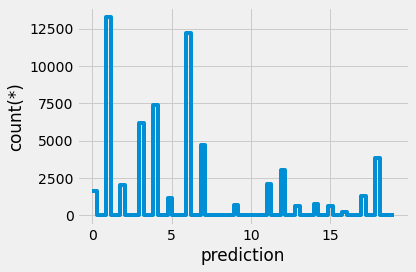

In [18]:
dest_data.plot1d(dest_data["prediction"])

In [52]:
def update_reviews_cluster(destination_id, lookup_df=dest_data,value_for_no_review = 99):
    print(type(destination_id))
    try:
        result = lookup_df[lookup_df.srch_destination_id == destination_id].prediction.values[0]
    except Exception:
        result = value_for_no_review
    return result

def get_reviews_cluster(df):
    value_for_no_review = 99
    print(df)
    try:
        result = dest_data.srch_destination_id[dest_data.srch_destination_id == df[0]].prediction.values[0]
    except Exception:
        result = value_for_no_review
    return result
    

In [54]:
from pandarallel import pandarallel
pandarallel.initialize()

test_df = pd.DataFrame()
test_df["srch_destination_id"] = train_data.srch_destination_id.values
#test_df = test.to_pandas_df()
#train_data['review_cluster'] = test_df.srch_destination_id.apply(update_reviews_cluster)
test_df["review_cluster"] = test_df.srch_destination_id.parallel_apply(get_reviews_cluster)
#df['is_prime'] = df.apply(slow_is_prime, arguments=[df.x])
# but this form only works for a single argument
#train_data['review_cluster'] = train_data.srch_destination_id.apply(update_reviews_cluster)
#train_data['review_cluster'] = train_data.apply(update_reviews_cluster, arguments=[df.x])
#train_data.review_cluster.unique()

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


TypeError: 'int' object is not subscriptable

In [36]:
test = train_data.head(10)
test["review_cluster"] = test.apply(update_reviews_cluster, arguments=[test.srch_destination_id])
test

ERROR:ThreadPoolExecutor-0_11:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_11:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_11:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_11:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_11:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_11:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_11:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_11:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_11:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_11:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_4:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_4:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_4:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_4:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_4:vaex.execution:nested execute call
ERROR:ThreadPoolExecutor-0_4:v

#,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,review_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.26,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1,99
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.26,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1,99
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.26,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1,99
3,2014-08-09 18:05:16,2,3,66,442,35390,913.193,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80,99
4,2014-08-09 18:08:18,2,3,66,442,35390,913.626,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21,99
5,2014-08-09 18:13:12,2,3,66,442,35390,911.514,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,92,99
6,2014-07-16 09:42:23,2,3,66,189,10067,nan,501,0,0,2,2014-08-01,2014-08-02,2,0,1,8267,1,0,2,2,50,675,41,99
7,2014-07-16 09:45:48,2,3,66,189,10067,nan,501,0,1,2,2014-08-01,2014-08-02,2,0,1,8267,1,0,1,2,50,675,41,99
8,2014-07-16 09:52:11,2,3,66,189,10067,nan,501,0,0,2,2014-08-01,2014-08-02,2,0,1,8267,1,0,1,2,50,675,69,99
9,2014-07-16 09:55:24,2,3,66,189,10067,nan,501,0,0,2,2014-08-01,2014-08-02,2,0,1,8267,1,0,1,2,50,675,70,99


In [33]:
?test.apply

Signature: test.apply(f, arguments=None, dtype=None, delay=False, vectorize=False)
Docstring:
Apply a function on a per row basis across the entire DataFrame.

Example:

>>> import vaex
>>> df = vaex.example()
>>> def func(x, y):
...     return (x+y)/(x-y)
...
>>> df.apply(func, arguments=[df.x, df.y])
Expression = lambda_function(x, y)
Length: 330,000 dtype: float64 (expression)
-------------------------------------------
     0  -0.460789
     1    3.90038
     2  -0.642851
     3   0.685768
     4  -0.543357


:param f: The function to be applied
:param arguments: List of arguments to be passed on to the function f.
:return: A function that is lazily evaluated.
File:      ~/anaconda3/lib/python3.8/site-packages/vaex/dataframe.py
Type:      method
